<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

In [0]:
from scipy import stats
import numpy as np

np.random.seed(seed=10)

coinflips = np.random.binomial(n=1, p=0.5, size=10000)

coinflips

array([1, 0, 1, ..., 0, 0, 1])

In [0]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 
    
    Arguments:
        data - iterable (list or numpy array) of sample observations
        confidence - level of confidence for the interval
    
    Returns:
        tuple of (mean, margin of error, lower bound, upper bound)
    """

    data = np.array(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    dof = len(data) - 1
    lower, upper = stats.t.interval(0.95, dof, mean, stderr)

    return (mean, lower, upper)

In [0]:
confidence_interval(coinflips)

(0.4909, 0.4811001270531048, 0.5006998729468952)

In [0]:
stats.norm.interval(0.95, np.mean(coinflips), stats.sem(coinflips))

(0.48110131331131867, 0.5006986866886813)

In [0]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(coinflips, .95)
bayes_mean

Mean(statistic=0.4909, minmax=(0.481101803257902, 0.5006981967420979))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats as st
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import pymc3

In [0]:
def display_probs(d):
    for key, value in d.items():
        print("Species: {:8} Prevalence: {}%".format(key, value*100))

In [0]:
animals = ['lions', 'tigers', 'bears']

c = np.array([3,2,1])

# hyperparams
alpha = np.array([1,1,1])
expected = (alpha + c) / (c.sum() + alpha.sum())

display_probs(dict(zip(animals,expected)))

Species: lions    Prevalence: 44.44444444444444%
Species: tigers   Prevalence: 33.33333333333333%
Species: bears    Prevalence: 22.22222222222222%


## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    """
    P(H|E) = (P(E|H) * P(H)) / P(E)
    P(E|H) = prob_positive_drunk
    P(H) = prob_drunk_prior
    P(E) = prob_positive
    """
    return (prob_positive_drunk * prob_drunk_prior) / prob_positive

In [0]:
prob_drunk_given_positive(1/1000, .08 ,1)

0.0125

In [0]:
# out of a group of 1000 people, 1 is really drunk.
# but of that 1000, 80 were identified as being drunk, including that one that actually is.
# so if you are identified as being drunk, you are part of a group of 80, where only one is actually drunk.
# 1/80 = 0.0125
# so that's the posterior probability.
prob_drunk_given_positive(1/80, .08 ,1)
# out of a group of 80, 6.4 were identified as being drunk, including the one that actually is.
# so 1/6.4 = # 0.15625
# that would be (1 * 1/80) / 0.08
# (1/80) / (8/100) = (1/80) * (100/8) = 100/640 = 0.15625
# probability has gone up, but still not good enough. let's run more tests til we get to beyond a reasonable doubt.
prob_drunk_given_positive(1/6.4, .08 ,1)
# 1.953125
# whoa that's way beyond a reasonable doubt. if you fail three in a row you are drunk.
# but does that make sense?
# (5/32) / (8/100) = (5/32) * (100/8) = 500/256 = 125/64
# let's think about this logically.
# so out of a group of 6.4 (bear with me), less than one, .512, were identified as being drunk
# well we know that at least one of the 6.4 actually is, so if less than 1 is identified, it makes sense that the probability is over 100% right?
# coooooooooooooool

1.953125

In [0]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Roboto'

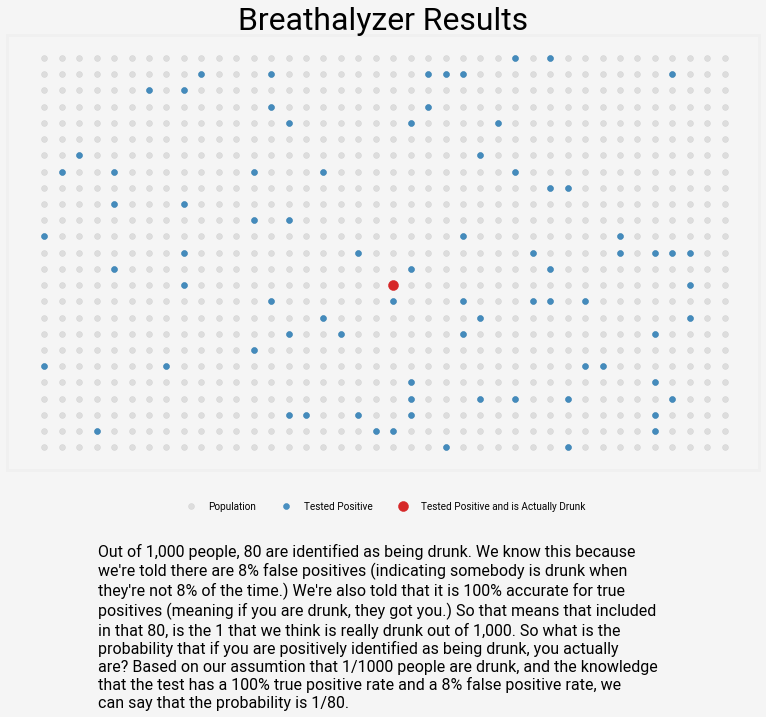

In [0]:
# i'm gunna plot this right quick

x = [num for num in range(40)]

# loop through those 40
# (0,0), (1,0), (2,0), (3,0) ...
# (0,1), (1,1), (2,1)

fig,ax = plt.subplots(figsize=(12,8), facecolor="whitesmoke")

ax.set_facecolor("whitesmoke")

xs = []
ys = []
for x in x:
    for y in range(25):
        xs.append(x)
        ys.append(y)

randomdf = pd.DataFrame({'X': xs, 'Y': ys})

randomdf.head()

randomsample = randomdf.sample(79)

plt.grid(None)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
    labelleft=False)
ax.scatter(xs, ys, alpha=0.2, c="gray")
ax.scatter(randomsample['X'], randomsample['Y'], alpha=.8, c="tab:blue")
ax.scatter(20,10, c="tab:red", s=100)

plt.title('Breathalyzer Results', fontsize=32)

plt.legend(
    ['Population',
     'Tested Positive',
     'Tested Positive and is Actually Drunk'],
     loc='upper center', bbox_to_anchor=(0.5, -0.05), 
     ncol=5, facecolor="whitesmoke", frameon=False
     )

plt.text(3.1,-16,
         """Out of 1,000 people, 80 are identified as being drunk. We know this because
we're told there are 8% false positives (indicating somebody is drunk when
they're not 8% of the time.) We're also told that it is 100% accurate for true
positives (meaning if you are drunk, they got you.) So that means that included
in that 80, is the 1 that we think is really drunk out of 1,000. So what is the 
probability that if you are positively identified as being drunk, you actually 
are? Based on our assumtion that 1/1000 people are drunk, and the knowledge 
that the test has a 100% true positive rate and a 8% false positive rate, we 
can say that the probability is 1/80.""",
         backgroundcolor="whitesmoke", fontsize=16)

plt.show()

In [78]:
# let's change this to say 1/250 people are drunk
# lets say it's a music festival or a college town on a friday night 

prob_drunk_given_positive(1/250, .08 ,1)

0.05

In [79]:
prob_drunk_given_positive(1/20, .08 ,1)

0.625

In [80]:
prob_drunk_given_positive(1/1.6, .08 ,1)

7.8125

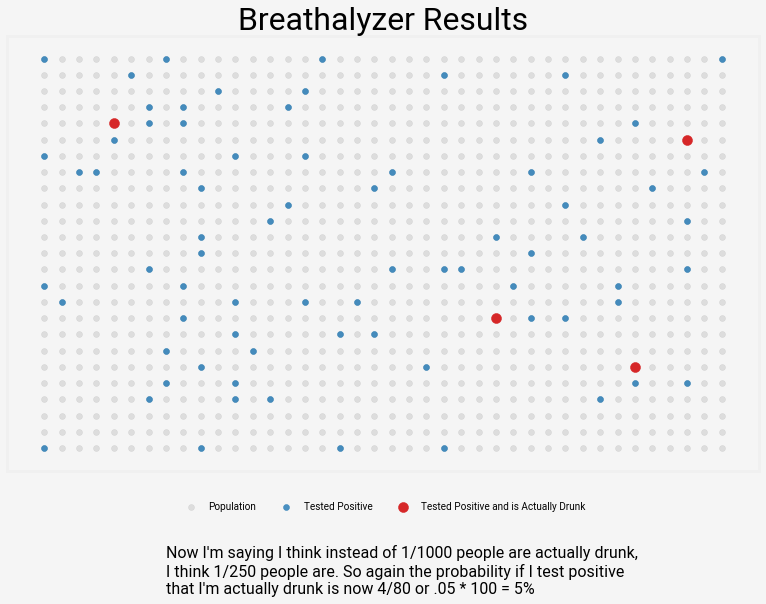

In [92]:
# i'm gunna plot this right quick

x = [num for num in range(40)]

# loop through those 40
# (0,0), (1,0), (2,0), (3,0) ...
# (0,1), (1,1), (2,1)

fig,ax = plt.subplots(figsize=(12,8), facecolor="whitesmoke")

ax.set_facecolor("whitesmoke")

xs = []
ys = []
for x in x:
    for y in range(25):
        xs.append(x)
        ys.append(y)

randomdf = pd.DataFrame({'X': xs, 'Y': ys})

randomdf.head()

randomsample = randomdf.sample(75)
randomsample2 = randomdf.sample(4)

plt.grid(None)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
    labelleft=False)
ax.scatter(xs, ys, alpha=0.2, c="gray")
ax.scatter(randomsample['X'], randomsample['Y'], alpha=.8, c="tab:blue")
ax.scatter(randomsample2['X'], randomsample2['Y'], c="tab:red", s=100)

plt.title('Breathalyzer Results', fontsize=32)

plt.legend(
    ['Population',
     'Tested Positive',
     'Tested Positive and is Actually Drunk'],
     loc='upper center', bbox_to_anchor=(0.5, -0.05), 
     ncol=5, facecolor="whitesmoke", frameon=False
     )

plt.text(7,-9,
         """Now I'm saying I think instead of 1/1000 people are actually drunk,
I think 1/250 people are. So again the probability if I test positive
that I'm actually drunk is now 4/80 or .05 * 100 = 5%""",
         backgroundcolor="whitesmoke", fontsize=16)

plt.show()

In [93]:
# now let's say that the test has a 1 percent false positive rate
prob_drunk_given_positive(1/1000, .01 ,1)

0.1

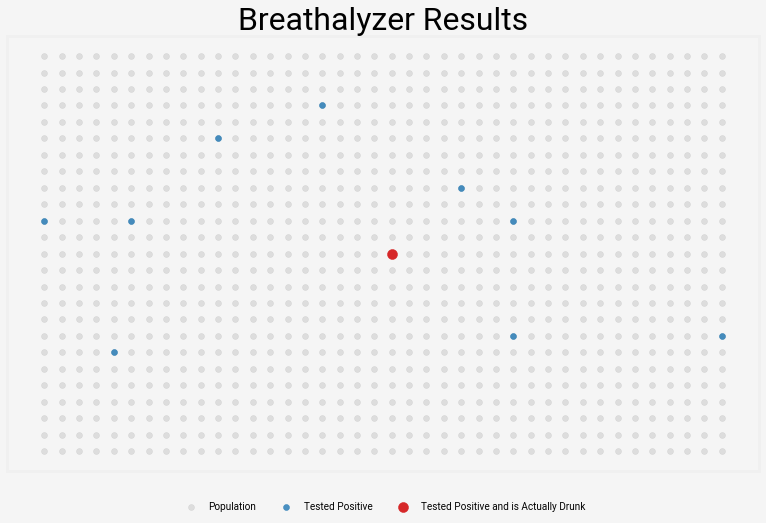

In [95]:
# i'm gunna plot this right quick

x = [num for num in range(40)]

# loop through those 40
# (0,0), (1,0), (2,0), (3,0) ...
# (0,1), (1,1), (2,1)

fig,ax = plt.subplots(figsize=(12,8), facecolor="whitesmoke")

ax.set_facecolor("whitesmoke")

xs = []
ys = []
for x in x:
    for y in range(25):
        xs.append(x)
        ys.append(y)

randomdf = pd.DataFrame({'X': xs, 'Y': ys})

randomdf.head()

randomsample = randomdf.sample(9)
randomsample2 = randomdf.sample(1)

plt.grid(None)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
    labelleft=False)
ax.scatter(xs, ys, alpha=0.2, c="gray")
ax.scatter(randomsample['X'], randomsample['Y'], alpha=.8, c="tab:blue")
ax.scatter(randomsample2['X'], randomsample2['Y'], c="tab:red", s=100)

plt.title('Breathalyzer Results', fontsize=32)

plt.legend(
    ['Population',
     'Tested Positive',
     'Tested Positive and is Actually Drunk'],
     loc='upper center', bbox_to_anchor=(0.5, -0.05), 
     ncol=5, facecolor="whitesmoke", frameon=False
     )

plt.show()

In [0]:
"""
    Pr(H|E) = Chance of having cancer (H) given a positive test (E). This is what we want to know: How likely is it to have cancer with a positive result? In our case it was 7.8%.
    Pr(E|H) = Chance of a positive test (E) given that you had cancer (H). This is the chance of a true positive, 80% in our case.
    Pr(H) = Chance of having cancer (1%).
    Pr(not H) = Chance of not having cancer (99%).
    Pr(E|not H) = Chance of a positive test (E) given that you didn’t have cancer (not H). This is a false positive, 9.6% in our case.
"""

In [0]:
"""
let's say the breathalyzer has a 75% true positve (returns true when drunk)
therefore miss 25% of drunks

it also has a 8% false positive
so it correctly identifies 92% as not being drunk
"""

In [275]:
# factors
# 1/1000 people are drunk
# test true_pos = 80/20
# test false_pos = 90/10

# if you are drunk, there's a 80% chance you will fail the breathalyzer
# if you are not drunk, there's a 10% chance you will fail

# you fail the test, what are the chances you are drunk?

# could be true positive, or could be false positive

# chances of true positive are .001 * .8
# chances of false positive are .999 * .1

# return (.001 * .8) / ((.001 * .8) + (.999 * .1))



# lets add a false positive, gunna have to rewrite the function
def prob_drunk_given_positive(prob_drunk_prior, , true_pos, false_pos):
    """
    P(H|E) = (P(E|H) * P(H)) / (P(H) * P(E|H) + P(-H) * P(E|-H)
    P(H) = chance of being drunk at all
    P(E) = testing positve
    P(H|E) = chance of being drunk given a positive result
    P(E|H) = chance of a positive test if you are drunk
    p(-H) = chance of not 
    """
    return (prob_positive_drunk * prob_drunk_prior) / prob_positive

SyntaxError: ignored

In [0]:
def bayes_it(prob_drunk_prior, prob_positive, prob_positive_drunk):
    return ((prob_positive_drunk * prob_drunk_prior) / prob_positive)

In [0]:
def prob_given_positive(prob_prior, prob_true_pos, prob_false_pos):
    """
    prob_prior = prior probability
    prob_true_pos = probability of true positives
        probability of identifying a person who is drunk
    prob_false_pos = probability of a false positive
        probability of misidentifying a person who is not drunk.
    """
    # P(E|H) * P(E)
    prob_desired_event = (prob_prior * prob_true_pos)
    # P(E|-H) * P(-H)
    prob_false_positive = (1-prob_prior) * prob_false_pos
    # (P(E|H) * P(E)) / ((P(E|H) * P(E)) + P(E|-H) * P(-H))
    return prob_desired_event / (prob_desired_event + prob_false_positive)

In [296]:
prob_given_positive(1/1000, 1/1, 8/100)

0.012357884330202669

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08092} \\
&= 0.0123578843
\end{aligned}
$$


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)